## Import modules required from qiskit

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, IBMQ, execute, QuantumRegister, ClassicalRegister

from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy

# Loading your IBM Quantum account(s)
## 
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Create a simple circuit with a quantum register of  qubit and classical register of 1 bit. Add a hadamard gate on the first qubit. Then measure each qubit to the classical register.

In [11]:
# Create the register (quantum and classical)
qin = QuantumRegister(1)
cin = ClassicalRegister(1)
# Create the quantum circuit
qc = QuantumCircuit(qin,cin)
# Create a hadamard gate
qc.h(0)
# Measure all qubits
qc.measure(0,0)

## Draw the quantum circuit

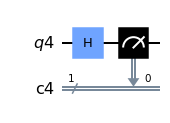

In [12]:
qc.draw(output='mpl')

## Get a list of the quantum backends, separate them as follows:
- Quantum Simulator
- Least Busy Quantum Simulator
- Real Quantum Computers
- Least Busy Quantum Computer

### Optional: you can use pprint to have formatted results

In [14]:
from pprint import pprint

print("All Quantum Simulators:")
pprint(provider.backends(simulator=True))
print("\n")

print("Least Busy Quantum Simulator:")
pprint(least_busy(provider.backends(simulator=True)))
print("\n")


print("List of all Quantum Computers")
pprint(provider.backends(simulator=False))
print("\n")

print("Least Busy Quantum Computer")
pprint(least_busy(provider.backends(simulator=False)))
print("\n")






All Quantum Simulators:
[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>]


Least Busy Quantum Simulator:
<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>


List of all Quantum Computers
[<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBacke

## Create two backends: one for simulator and the second is for a quantum computer.

In [16]:
# Create two backends named: sim_backend and real_backend
sim_backend = provider.get_backend('ibmq_qasm_simulator')
real_backend = provider.get_backend('ibmq_belem')

## Run the circuit on both backends


In [20]:
# Running on a quantum simulator
sim_job = execute(qc, sim_backend, shots = 1024)

# Monitor the status of the job
print(f"Job is running under id: {sim_job.job_id()}") 
job_monitor(sim_job)

# Get the result
print(" The result of the execution is: ")
sim_result = sim_job.result()
sim_counts = sim_result.get_counts(qc)
print(sim_counts)





## Print nice line
print("\n\n")






# Run on a quantum computer
real_job = execute(qc, real_backend, shots = 1024)

# Monitor the status of the job
print(f"Job is running under id: {real_job.job_id()}") 
job_monitor(real_job)

# Get the result
print(" The result of the execution is: ")
real_result = real_job.result()
real_counts = real_result.get_counts(qc)
print(real_counts)

Job is running under id: 638f064e0c52a750640dfbd1
Job Status: job has successfully run
 The result of the execution is: 
{'0': 502, '1': 522}



Job is running under id: 638f0655004b547875532806
Job Status: job has successfully run
 The result of the execution is: 
{'0': 510, '1': 514}


## Visualize the results for both the quantum simulator and the quantum computer

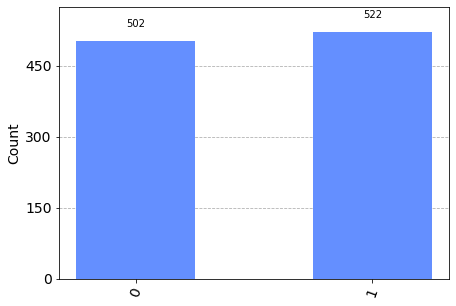

In [21]:
# Print the result on a quantum simulator
display(plot_histogram(sim_counts))

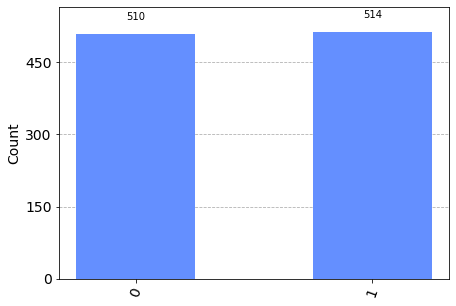

In [22]:
# Print the result on a quantum computer
display(plot_histogram(real_counts))

## Working with Qiskit Aer
- This is useful if you don't have an access to the Internet
## Let's try to work on our local IDE